In [ ]:
# Logistic Regression
# Code by Pascal Wallisch and Stephen Spivack
# Date: 11-30-21

In [ ]:
# In this lab, we want to use logistic regression to predict whether a
# given applicant will be admitted to grad school based on their GRE score.

# Of course, there are other factors that determine whether someone will
# be admited, but here we want to use GRE scores as the single predictor 
# for our binary outcome--whether that person will be accepted.

In [1]:
# Load data:
import numpy as np
data = np.genfromtxt('greData.csv',delimiter=',')

In [2]:
# Inspect data:
print('First 10 rows out of',len(data),'total:')
print(data[:10])

# Each row is a given applicant. The first column is their GRE score and
# the second column is whether they got accepted into the grad program.

First 10 rows out of 500 total:
[[289.   0.]
 [292.   0.]
 [325.   1.]
 [331.   1.]
 [329.   0.]
 [278.   0.]
 [308.   0.]
 [321.   0.]
 [319.   0.]
 [322.   1.]]


In [3]:
# Admitted students descriptives:
numAdmitted = len(np.argwhere(data[:,1]==1))
avgAdmissionScore = np.mean(data[np.argwhere(data[:,1]==1),0])
admissionStd = np.std(data[np.argwhere(data[:,1]==1),0])
print('Number of admitted students:',numAdmitted)
print('Avg admitted score:',avgAdmissionScore.round(3))
print('Std admitted score:',admissionStd.round(3))

Number of admitted students: 150
Avg admitted score: 320.053
Std admitted score: 8.538


In [4]:
# Rejected students descriptives:
numRejected = len(np.argwhere(data[:,1]==0))
avgRejectionScore = np.mean(data[np.argwhere(data[:,1]==0),0])
rejectionStd = np.std(data[np.argwhere(data[:,1]==0),0])
print('Number of rejected students:',numRejected)
print('Avg rejected score:',avgRejectionScore.round(3))
print('Std rejected score:',rejectionStd.round(3))

Number of rejected students: 350
Avg rejected score: 296.317
Std rejected score: 12.486


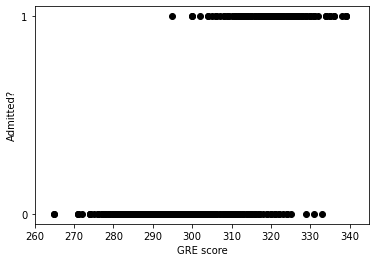

In [5]:
# Plot data:
import matplotlib.pyplot as plt
plt.scatter(data[:,0],data[:,1],color='black')
lowerBound,upperBound = 260,345
plt.xlabel('GRE score')
plt.xlim([lowerBound,upperBound])
plt.ylabel('Admitted?')
plt.yticks(np.array([0,1]))
plt.show()

In [6]:
# Run the logistic regression

# Import logisitic regression function:
from sklearn.linear_model import LogisticRegression

# Format data for our model:
x = data[:,0].reshape(len(data),1) 
y = data[:,1]

# Fit our model to the data:
model = LogisticRegression().fit(x,y)

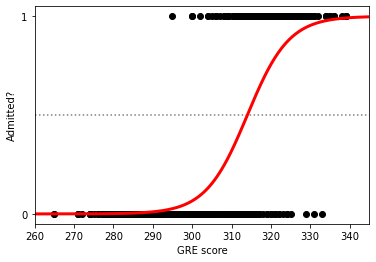

In [7]:
# Plot the data

# Init data:
from scipy.special import expit # this is the logistic sigmoid function
x1 = np.linspace(lowerBound,upperBound,len(data))
y1 = x1 * model.coef_ + model.intercept_
sigmoid = expit(y1)

# Plot:
plt.plot(x1,sigmoid.ravel(),color='red',linewidth=3)
plt.scatter(data[:,0],data[:,1],color='black')
plt.hlines(0.5,lowerBound,upperBound,colors='gray',linestyles='dotted')
plt.xlabel('GRE score')
plt.xlim([lowerBound,upperBound])
plt.ylabel('Admitted?')
plt.yticks(np.array([0,1]))
plt.show()

In [8]:
# Use our model to make predictions:
testScore = 315
probGettingIn = sigmoid[0,np.abs(x1-testScore).argmin()]
print('Probability of getting accepted:',probGettingIn.round(3))

Probability of getting accepted: 0.547
